# Training Car Occurrence Model

## Import Libraries

In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 1


## Define Paths

In [14]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/Car Occurrence Model/data/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/Car Occurrence Model/data/test'


## Define Constants

In [18]:
INPUT_SHAPE = (224, 224, 3)
BATCH_SIZE = 32
INPUT_SIZE = (224, 224)

## Data Augmentation and Preprocessing

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=INPUT_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=INPUT_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

Found 4872 images belonging to 2 classes.
Found 1218 images belonging to 2 classes.


## Build the Model

In [30]:
# Load ResNet50 without top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=INPUT_SHAPE)

# Freeze convolutional base except last 10 layers
for layer in base_model.layers[:-10]:
    layer.trainable = False

# Add custom classification layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)

## Model Summary

In [31]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_6[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 49,312,129 (188.11 MB)

 Trainable params: 30,189,569 (115.16 MB)

 Non-trainable params: 19,122,560 (72.95 MB)

## Compile and Train the Model

In [38]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                    min_delta=0.01,
                                    patience=10,
                                    verbose=1,
                                    mode='auto')
]

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator,
    callbacks=callbacks
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.9747 - loss: 0.0746 - val_accuracy: 0.9893 - val_loss: 0.0384
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.9712 - loss: 0.0859 - val_accuracy: 0.9918 - val_loss: 0.0266
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.9763 - loss: 0.0644 - val_accuracy: 0.9819 - val_loss: 0.0730
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.9794 - loss: 0.0588 - val_accuracy: 0.9384 - val_loss: 0.1511
Epoch 5/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.9803 - loss: 0.0508 - val_accuracy: 0.9565 - val_loss: 0.1433
Epoch 6/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9827 - loss: 0.0543 - val_accuracy: 0.9729 - val_loss: 0.0632
Epoch 7/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.9799 - loss: 0.0631 - val_accuracy: 0.5123 - val_loss: 8.6957
Epoch 8/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.9747 - loss: 0.0690 - val_accuracy: 0.9581 - val_lo

## Evaluate the Model

In [39]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc}\n"
      f"Test loss: {test_loss}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 277ms/step - accuracy: 0.9832 - loss: 0.0561
Test accuracy: 0.976190447807312
Test loss: 0.0828467458486557


## Plot Loss Curves

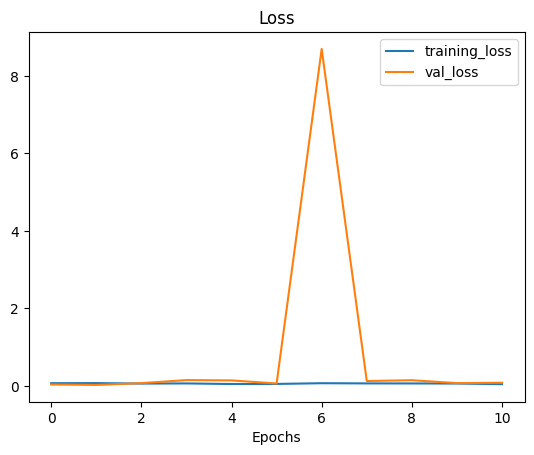

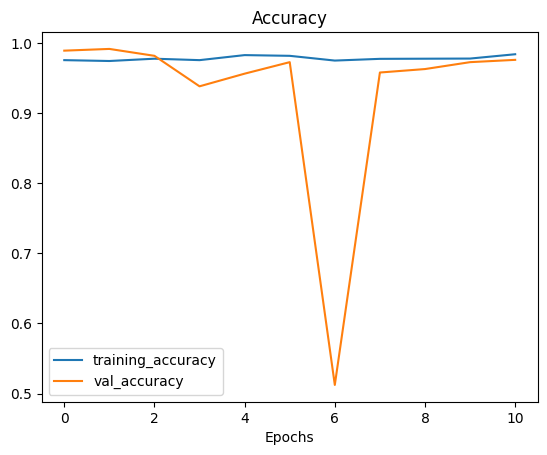

In [40]:
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.

    Args:
      history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

plot_loss_curves(history)

## Save and Export Model

In [44]:
model.save('car_occurrence_model.keras')

---